<a href="https://colab.research.google.com/github/cyberone1812/CMUDeepLearning/blob/main/cmu_dele_week_3_ohours_intro_pytorch_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objectives

- Compute Neural Network forward pass by hand
- Use `pytorch` to build regression model
- Use `pytorch` to build classification models
- Understand how to use the `Dataset` and DataLoader` objects in `pytorch`

In [ ]:
import torch
import torch.nn as nn
from torch.utils import data
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

#### Computations

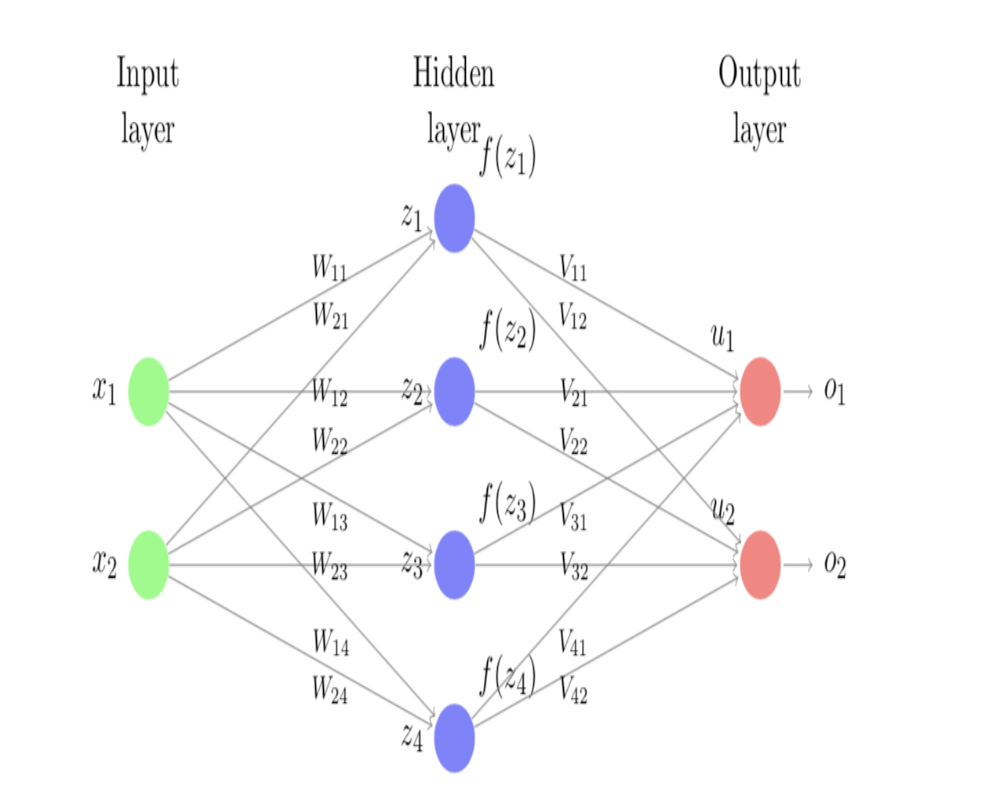

In [ ]:
W = np.array([[1, 0, -1],
          [0, 1, -1],
          [-1, 0, -1],
          [0, -1, -1]])

In [ ]:
V = np.array([[1, 1, 1, 1, 0],
              [-1, -1, -1, -1, 2]])

In [ ]:
X = np.array([ [3], [14], [1]])

#### Regression with `pytorch`

In [ ]:
X = torch.randn(100, 1)*10
y = X + torch.randn(100, 1)*2.5

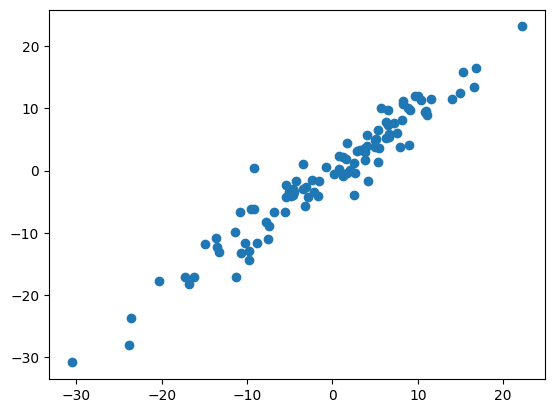

In [ ]:
plt.scatter(X, y)

In [ ]:
model = nn.Linear(in_features = 1, out_features = 1)

In [ ]:
print(model.bias, model.weight)

Parameter containing:
tensor([0.9780], requires_grad=True) Parameter containing:
tensor([[0.8833]], requires_grad=True)


In [ ]:
x = torch.tensor([5.0])

In [ ]:
model(x)

tensor([5.3945], grad_fn=<ViewBackward0>)

In [ ]:
model.weight*5 + model.bias

tensor([[5.3945]], grad_fn=<AddBackward0>)

In [ ]:
#using the sequential approach
model = nn.Sequential(nn.Linear(1, 1))

In [ ]:
model(x)

tensor([-0.9094], grad_fn=<ViewBackward0>)

In [ ]:
import torch.nn as nn

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    return self.linear(x)

In [ ]:
lr = LinearRegression(2, 1)

In [ ]:
list(lr.parameters())

[Parameter containing:
 tensor([[-0.4150,  0.4915]], requires_grad=True),
 Parameter containing:
 tensor([0.1216], requires_grad=True)]

In [ ]:
x = torch.tensor([[3.2, 1.1]])

In [ ]:
lr.forward(x)

tensor([[-0.6659]], grad_fn=<AddmmBackward0>)

In [ ]:
lr = LinearRegression(1, 1) # model

In [ ]:
criterion = nn.MSELoss() # loss

In [ ]:
X =( X - X.mean() )/ X.std()

In [ ]:
optimizer = torch.optim.SGD(lr.parameters(), lr = 0.01) # optimizer

In [ ]:
epochs = 1000
losses = []
for i in range(epochs):
  yhat = lr.forward(X)
  loss = criterion(yhat, y)
  if i%100 == 0:
    print(f'Epoch {i}, loss {loss.item()}')
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0, loss 91.7789077758789
Epoch 100, loss 7.671004772186279
Epoch 200, loss 6.130098819732666
Epoch 300, loss 6.101868152618408
Epoch 400, loss 6.101351261138916
Epoch 500, loss 6.101342678070068
Epoch 600, loss 6.10134220123291
Epoch 700, loss 6.10134220123291
Epoch 800, loss 6.10134220123291
Epoch 900, loss 6.10134220123291


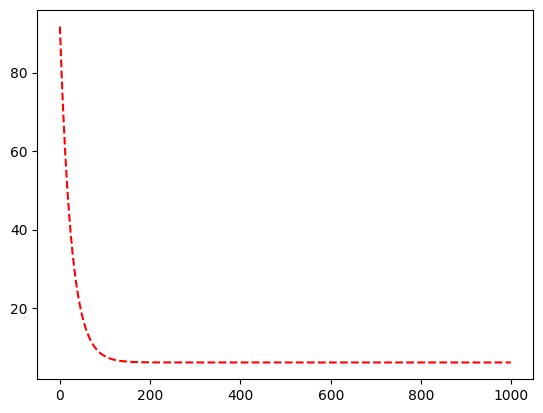

In [ ]:
#plot the losses
plt.plot(range(epochs), [i.detach().numpy() for i in losses], '--r')

In [ ]:
w, b = list(lr.parameters())

In [ ]:
list(lr.parameters())

[Parameter containing:
 tensor([[9.5355]], requires_grad=True),
 Parameter containing:
 tensor([-0.5713], requires_grad=True)]

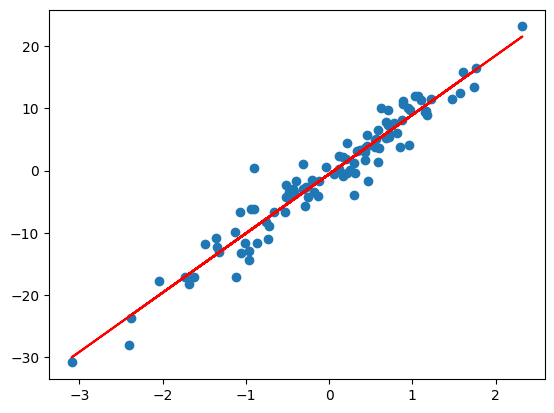

In [ ]:
plt.scatter(X, y)
plt.plot(X, w.detach()*X + b.detach(), '-r')

In [ ]:
#one linear model
model_a = nn.Sequential(nn.Linear(1, 20),
                        nn.ReLU(),
                        nn.Linear(20, 1))



In [ ]:
class LinearModelB(nn.Module):
  def __init__(self):
    super().__init__()
    layer_1 = nn.Linear(1, 20)
    activation = nn.ReLU()
    layer_2 = nn.Linear(20, 1)
    # layers = nn.Sequential(nn.Linear(1, 20),
    #                     nn.ReLU(),
    #                     nn.Linear(20, 1))



  def forward(self, x):
    x = self.linear_1(x)
    x = self.activation(x)
    x = self.linear_2(x)
    return x


### Classification Example

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

In [ ]:
X = cancer.data
y = cancer.target

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sscaler = StandardScaler()
X = sscaler.fit_transform(X)

In [ ]:
X.shape

(569, 30)

In [ ]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(30, 32)
        self.layer_2 = nn.Linear(32,32)
        self.layer_out = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, X):
        x = self.relu(self.layer_1(X))
        x = self.relu(self.layer_2(x))
        x = self.layer_out(x)
        x = self.sigmoid(x)
        return x

In [ ]:
model = Classifier()

In [ ]:
X = torch.from_numpy(X)
y = torch.from_numpy(y.reshape(-1, 1))
X = X.float()
y = y.float()

In [ ]:
def training_loop(n_epochs, optimizer, model, loss_fn, x_train, y_train):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(x_train)
        loss_train = loss_fn(t_p_train, y_train)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        if epoch == 1 or epoch % 100 == 0:
            print(epoch, loss_train.item())

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [ ]:
training_loop(n_epochs=5000, optimizer=optimizer, model = model, loss_fn=nn.BCELoss(),
             x_train=X, y_train=y)

1 0.6920086145401001
100 0.6852417588233948
200 0.6784817576408386
300 0.6717149615287781
400 0.664882242679596
500 0.6579638123512268
600 0.6509038209915161
700 0.643657922744751
800 0.6361246705055237
900 0.6282746195793152
1000 0.6200309991836548
1100 0.6113701462745667
1200 0.6021838784217834
1300 0.5924668312072754
1400 0.5821333527565002
1500 0.5711106657981873
1600 0.5593865513801575
1700 0.5469421148300171
1800 0.5338079333305359
1900 0.5200484991073608
2000 0.5056325793266296
2100 0.4905802011489868
2200 0.474907249212265
2300 0.4587411880493164
2400 0.44223806262016296
2500 0.4254465401172638
2600 0.4085662364959717
2700 0.39172857999801636
2800 0.3750542104244232
2900 0.35868769884109497
3000 0.34276774525642395
3100 0.32739323377609253
3200 0.31263434886932373
3300 0.2985905706882477
3400 0.2853129804134369
3500 0.2727983593940735
3600 0.2610492408275604
3700 0.2500564754009247
3800 0.23980307579040527
3900 0.23024778068065643
4000 0.22135882079601288
4100 0.213083967566490

In [ ]:
model(X)

tensor([[5.4629e-03],
        [1.3190e-01],
        [2.2368e-02],
        [2.4177e-02],
        [1.2806e-01],
        [2.2638e-01],
        [1.1396e-01],
        [2.2044e-01],
        [7.7513e-02],
        [2.1679e-02],
        [4.1490e-01],
        [1.1686e-01],
        [3.7247e-02],
        [5.4192e-01],
        [6.8833e-02],
        [3.3774e-02],
        [3.7955e-01],
        [4.5767e-02],
        [2.9140e-02],
        [8.5111e-01],
        [8.9663e-01],
        [9.7751e-01],
        [6.7785e-02],
        [2.9231e-02],
        [2.4686e-02],
        [1.3430e-02],
        [4.3442e-02],
        [1.8447e-01],
        [3.5321e-02],
        [2.6926e-01],
        [1.4614e-02],
        [1.2199e-01],
        [3.8829e-02],
        [1.8842e-02],
        [7.2499e-02],
        [8.2783e-02],
        [2.5075e-01],
        [9.5367e-01],
        [6.7697e-01],
        [4.0061e-01],
        [8.1813e-01],
        [7.9959e-01],
        [6.5940e-03],
        [2.4747e-01],
        [3.9887e-01],
        [3

In [ ]:
preds = np.where(model(X) >= 0.5, 1, 0)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y, preds)

array([[195,  17],
       [  3, 354]])

In [ ]:
print(classification_report(y, preds))

              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95       212
         1.0       0.95      0.99      0.97       357

    accuracy                           0.96       569
   macro avg       0.97      0.96      0.96       569
weighted avg       0.97      0.96      0.96       569



In [ ]:
np.unique(y, return_counts = True)

(array([0., 1.], dtype=float32), array([212, 357]))

In [ ]:
(192)/(192 + 20)

In [ ]:
357/(357 + 212)

0.6274165202108963

In [ ]:
(195 + 354)/(195 + 354 + 4 + 20)

0.9648506151142355

### Using the `Dataset` and `DataLoader`

In [ ]:
class MyData(data.Dataset):
  #loads data into class
  def __init__(self, X, Y):
    self.X = X
    self.Y = Y

  #determines how many data samples exist
  def __len__(self):
    return len(self.Y)

  #returns the sample based on index
  def __getitem__(self, index):
    X = self.X[index].float().reshape(-1)
    Y = self.Y[index].long()
    return X, Y

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X, Y = make_classification()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [ ]:
train_data = MyData(torch.tensor(X_train),
                    torch.tensor(y_train))

In [ ]:
train_loader = DataLoader(train_data,
                          shuffle = True,
                          batch_size = 64,
                          num_workers = 4,
                          pin_memory = True)

In [ ]:
train_data.__getitem__(0)

#### Using built-in datasets

In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
train_data = datasets.FashionMNIST(root = 'data', download = True, transform=ToTensor())

In [ ]:
test_data = datasets.FashionMNIST( root = 'data', train = False, download = True, transform = ToTensor())

In [ ]:
img, label = train_data[0]

In [ ]:
plt.imshow(img[0].squeeze(), cmap = 'gray')

In [ ]:
train_dataloader = DataLoader(train_data, batch_size = 20, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 20, shuffle = False)

In [ ]:
train_ims, train_labels = next(iter(train_dataloader))

In [ ]:
train_ims.shape

In [ ]:
plt.imshow(train_ims[0].squeeze(), cmap = 'gray')

In [ ]:
len(train_ims)

#### Creating a custom dataset

In [ ]:
train_im_sample = []
train_label_sample = []
for i in range(20):
  train_im_sample.append(train_data[i][0].numpy())
  train_label_sample.append(train_data[i][1])

In [ ]:
ims_npy = np.array(train_im_sample)

In [ ]:
np.save('ims_npy.npy', ims_npy)

In [ ]:
labels_npy = np.array(train_label_sample)

In [ ]:
np.save('labels_npy.npy', labels_npy)

In [ ]:
class CustomImageDataset(Dataset):

  def __init__(self, imgs, labels):
    self.imgs = np.load(imgs)
    self.labels = np.load(labels)

  def __len__(self):
    return len(self.labels)

  def __getitem__(self, index):
    im = self.imgs[index]
    label = self.labels[index]
    return im, label


In [ ]:
train_data_custom = CustomImageDataset('ims_npy.npy', 'labels_npy.npy')

In [ ]:
train_dataloader = DataLoader(train_data_custom, batch_size = 5, shuffle = True)

In [ ]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

#### Example with `numpy`

In [ ]:
import seaborn as sns

In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
iris.head()

In [ ]:
iris['species'].value_counts()

In [ ]:
X = iris.drop('species', axis = 1)
y = iris['species'].replace({'setosa': 0, 'virginica': 1, 'versicolor': 2})

In [ ]:
type(X)

In [ ]:
type(y)

In [ ]:
class IrisData(Dataset):
  def __init__(self, X, y):
    self.x = X
    self.y = y

  def __len__(self):
    return len(self.y)

  def __getitem__(self, index):
    measures = torch.tensor(self.x.iloc[index].values)
    label = torch.tensor(self.y.iloc[index].values)
    return measures, label

In [ ]:
train_data = IrisData(X, y)

In [ ]:
iris_loader = DataLoader(train_data, batch_size = 20)

In [ ]:
class IrisModel(nn.Module):
  def __init__(self, X, y):
    super().__init__()
    self.linear_1 = nn.Linear(in_features = 4, out_features = 32)
    self.linear_2 = nn.Linear(in_features = 32, out_features = 3)
    self.relu = nn.ReLU()
    self.softmax = nn.Softmax()

  def forward(self, X):
    x = self.relu(self.linear_1(X))
    x = self.linear_2(x)
    x = self.softmax(x)
    return x

In [ ]:
iris = IrisModel(X, y)

In [ ]:
iris

In [ ]:
loss_fn = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.SGD(iris.parameters(), lr = 0.01)